I) The period of a pendulum of length l oscillating at a large angle $\alpha$ is given by
$$
T=T_{0} \frac{\sqrt{2}}{\pi} \int_{0}^{\alpha} \frac{d \theta}{(\cos \theta-\cos \alpha)^{\frac{1}{2}}}
$$
where
$$
T_{0}=2 \pi \sqrt{\frac{l}{g}}
$$
is the period of the same pendulum at small amplitudes. Any numerical evaluation of the integral as is would fail (explain why). If we change the variable by writing:
$$
\sin \frac{\theta}{2}=\sin \frac{\alpha}{2} \sin \phi
$$
we can get:
$$
T=\frac{2 T_{0}}{\pi} \int_{0}^{\frac{\pi}{2}} \frac{d \phi}{\left(1-\sin ^{2} \frac{\alpha}{2} \sin ^{2} \phi\right)^{\frac{1}{2}}}
$$
which is a well-behaved integral. Write a program to use the above integral to calculate the ratio $T/T_0$ for integral amplitudes $0^\circ \le\alpha \le 90^\circ$. Output these values as a pandas dataframe showing the amplitude in degrees and radians as well as $T/T_0$, and make a plot with the two columns. Explain the result when $\alpha = 0.$

1.570823139928388

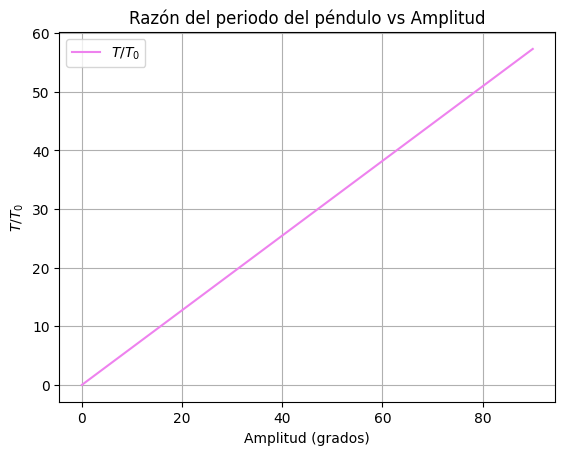

In [37]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt
l=2
g=9.8
T0 = 2*np.pi*((l/g)**0.5)

def integral(alpha, phi):
  s1=(np.sin(alpha/2))**2
  s2=(np.sin(phi))**2
  i=1/((1-(s1*s2))**0.5)
  return i

def calcular_integral(alpha):
    alpha_rad = np.radians(alpha)  # Convertimos alpha a radianes
    integ, _ = quad(integral, 0, np.pi / 2, args=(alpha_rad))
    return integ

def razon(calcular_integral):
  r=(2/np.pi)*calcular_integral
  return r

def calcular_T_T0(alpha):
    integral = calcular_integral(alpha)  # Calculamos la integral
    return (2 / np.pi) * integral
# Generamos valores de alpha (de 0° a 90°)
alpha_grados = np.linspace(0, 90, 100)
valores = [razon(alpha) for alpha in alpha_grados]

# Crear DataFrame
data = {
    'Alpha (grados)': alpha_grados,
    'Alpha (radianes)': np.radians(alpha_grados),
    'T/T0': valores
}

df = pd.DataFrame(data)


# Graficar los resultados
plt.plot(df['Alpha (grados)'], df['T/T0'], label='$T/T_0$', color='violet')
plt.xlabel('Amplitud (grados)')
plt.ylabel('$T/T_0$')
plt.title('Razón del periodo del péndulo vs Amplitud')
plt.grid(True)
plt.legend()
plt.show()



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos del archivo CSV
archivo = "datos_pendulo.csv"  # Asegúrate de que el archivo está en la misma carpeta o coloca la ruta correcta
df = pd.read_csv(archivo)

# Renombramos las columnas para mayor claridad
df.columns = ["Tiempo_ms", "AnguloDeg"]

# Convertimos el tiempo de milisegundos a segundos
df["Tiempo_s"] = df["Tiempo_ms"] / 1000

# Convertimos el ángulo de grados a radianes
df["AnguloRad"] = np.deg2rad(df["AnguloDeg"])

# --- Gráfico del ángulo en función del tiempo ---
plt.figure(figsize=(9, 5))
plt.plot(df["Tiempo_s"], df["AnguloDeg"], color="blue", linestyle="-", label="Ángulo (°)")
plt.xlabel("Tiempo (s)")
plt.ylabel("Ángulo (°)")
plt.title("Oscilación del péndulo")
plt.legend()
plt.grid()
plt.show()

# --- Cálculo de la velocidad angular ---
# Usamos np.diff para calcular diferencias finitas y derivar numéricamente
dt = np
